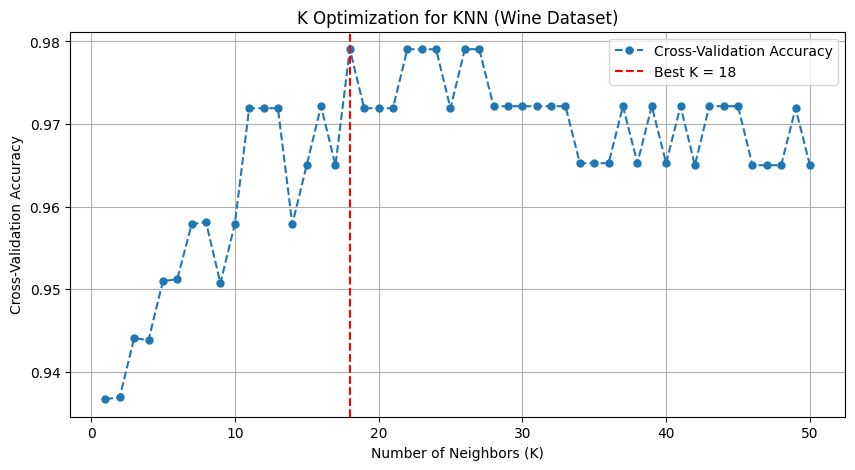

Valore ottimale di K: 18
Accuratezza migliore: 0.9791


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Caricare il dataset Wine
wine = load_wine()
X, y = wine.data, wine.target

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizzazione delle feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ricerca del miglior K usando Cross-Validation
k_range = range(1, 51)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

# Identificare il miglior valore di K
best_k = k_range[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)

# Plot dell'accuratezza per diversi valori di K
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed', markersize=5, label='Cross-Validation Accuracy')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K Optimization for KNN (Wine Dataset)')
plt.legend()
plt.grid()
plt.show()

# Stampare il miglior valore di K e la sua accuratezza
print(f"Valore ottimale di K: {best_k}")
print(f"Accuratezza migliore: {best_accuracy:.4f}")
